Câu 3. Hồi quy tuyến tính (3 điểm) 
Tập tin ‘IQ6.xls’ chứa dữ liệu huấn luyện về mối quan hệ giữa chỉ số IQ với điểm thi của các môn học. 

3.1) Vẽ biểu đồ phân phối và cho biết những giá trị thống kê cơ bản của điểm thi các môn. Xác 
định outlier(s), nếu có, của chỉ số IQ và của điểm thi các môn dựa trên quy tắc 3-Sigma. 

3.2) Tính hệ số tương quan Pearson giữa IQ và các điểm thi. Trên cơ sở đó, chọn điểm thi của 1 
trong các môn để dự đoán chỉ số IQ theo phương pháp hồi quy tuyến tính dựa trên a) Gradient 
Descent VÀ b) Công thức hiệp phương sai. Trực quan hóa dữ liệu. 

3.3) Dự đoán chỉ số IQ cho tập dữ liệu thử nghiệm (test set): { 0.5, 1.0, 1.5, 2.0, …, 9.0, 9.5, 10 }. 

3.4) Nhận xét kết quả khi dùng diem_5 để dự đoán chỉ số IQ.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import zscore

In [2]:
df = pd.read_excel('Data/IQ6.xls', index_col=0)
df

,diem_1,diem_2,diem_3,diem_4,diem_5,diem_6,IQ
stt,,,,,,,
1,8,2.0,7.0,7,1.4,8.0,68
2,8,8.4,6.4,8,4.0,1.6,137
3,7,7.6,7.8,8,5.2,2.4,135
4,8,7.0,2.5,6,6.4,7.0,79
5,8,4.4,3.8,6,1.0,5.6,107
6,8,6.4,7.2,7,5.6,3.6,128
7,7,8.0,8.4,8,4.4,2.0,120
8,8,2.8,6.8,6,0.4,7.2,74
9,6,5.2,5.0,7,5.0,4.8,110


In [3]:
df.head()

,diem_1,diem_2,diem_3,diem_4,diem_5,diem_6,IQ
stt,,,,,,,
1,8,2.0,7.0,7,1.4,8.0,68
2,8,8.4,6.4,8,4.0,1.6,137
3,7,7.6,7.8,8,5.2,2.4,135
4,8,7.0,2.5,6,6.4,7.0,79
5,8,4.4,3.8,6,1.0,5.6,107


3.1) Vẽ biểu đồ phân phối và cho biết những giá trị thống kê cơ bản của điểm thi các môn. Xác định outlier(s), nếu có, của chỉ số IQ và của điểm thi các môn dựa trên quy tắc 3-Sigma.

In [4]:
score = ['diem_1','diem_2','diem_3','diem_4','diem_5','diem_6']

In [28]:
from numpy import mean, median
for i in df.columns:
    k = df[i].to_numpy()
    print(f'Thống kê cơ bản {i}:')
    print('Mean   x_  = ', mean(k))
    print('MIN    x_min = ', min(df[i]))
    print('MAX    x_max = ',max(df[i]))
    print('Median x_med = ', median(k))
    x_mod = scipy.stats.mode(k)
    print('Mode   x_mod = ', x_mod[0][0])
    print('       f(x)  =', x_mod[1][0])
    print('\n\n')

Thống kê cơ bản diem_1:
Mean   x_  =  7.6
MIN    x_min =  6
MAX    x_max =  8
Median x_med =  8.0
Mode   x_mod =  8
       f(x)  = 14



Thống kê cơ bản diem_2:
Mean   x_  =  6.119999999999999
MIN    x_min =  2.0
MAX    x_max =  9.6
Median x_med =  6.2
Mode   x_mod =  4.4
       f(x)  = 2



Thống kê cơ bản diem_3:
Mean   x_  =  6.859999999999999
MIN    x_min =  2.5
MAX    x_max =  9.2
Median x_med =  7.1
Mode   x_mod =  7.2
       f(x)  = 2



Thống kê cơ bản diem_4:
Mean   x_  =  7.0
MIN    x_min =  6
MAX    x_max =  9
Median x_med =  7.0
Mode   x_mod =  6
       f(x)  = 7



Thống kê cơ bản diem_5:
Mean   x_  =  4.08
MIN    x_min =  0.4
MAX    x_max =  8.0
Median x_med =  4.2
Mode   x_mod =  2.4
       f(x)  = 2



Thống kê cơ bản diem_6:
Mean   x_  =  4.08
MIN    x_min =  0.4
MAX    x_max =  8.0
Median x_med =  4.2
Mode   x_mod =  2.4
       f(x)  = 2



Thống kê cơ bản IQ:
Mean   x_  =  115.2
MIN    x_min =  68
MAX    x_max =  140
Median x_med =  120.0
Mode   x_mod =  110
       f

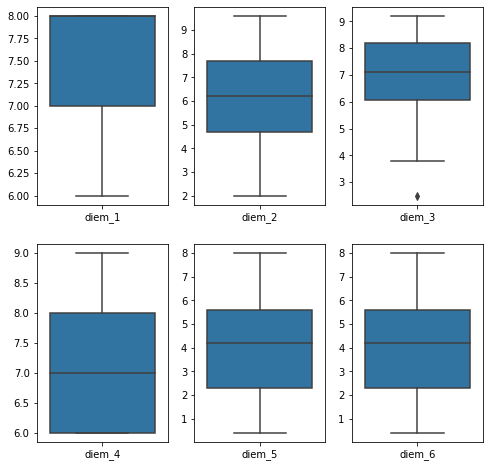

In [6]:
k = 0
plt.figure(figsize = (8, 8))
for diem in score:
    k+=1
    plt.subplot(2, 3, k)
    sns.boxplot(data = df[[diem]])
    

Xác định outlier(s), nếu có, của chỉ số IQ và của điểm thi các môn dựa trên quy tắc 3-Sigma.

<function matplotlib.pyplot.show(close=None, block=None)>

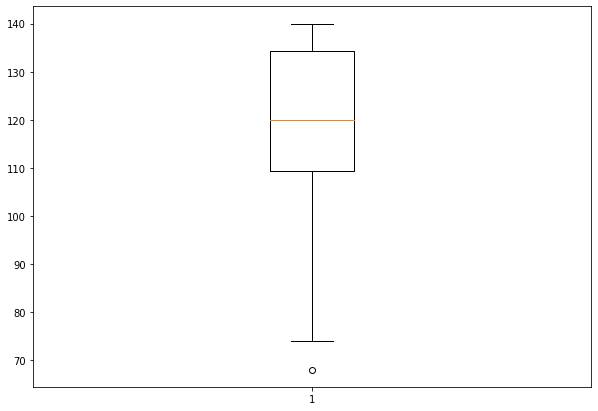

In [7]:
plt.figure(figsize =(10, 7))
plt.boxplot(df['IQ'])
plt.show

In [8]:
sigma = 2
outliers = []
indexes = []
for i in df.columns:
    data = df[i].to_numpy()
    data_zscore = zscore(data)
    outliers     = data_zscore[[(n < (sigma * -1))|(n > sigma) for n in data_zscore]]
    indexes      = [data_zscore.tolist().index(i) for i in outliers]
    print(f"Chỉ số của outliers {i}:{indexes}")
    print(f"Giá trị outliers {i}   : {data[indexes]}\n\n")

Chỉ số của outliers diem_1:[8, 8]
Giá trị outliers diem_1   : [6 6]


Chỉ số của outliers diem_2:[]
Giá trị outliers diem_2   : []


Chỉ số của outliers diem_3:[3]
Giá trị outliers diem_3   : [2.5]


Chỉ số của outliers diem_4:[12]
Giá trị outliers diem_4   : [9]


Chỉ số của outliers diem_5:[]
Giá trị outliers diem_5   : []


Chỉ số của outliers diem_6:[]
Giá trị outliers diem_6   : []


Chỉ số của outliers IQ:[0]
Giá trị outliers IQ   : [68]




3.2) Tính hệ số tương quan Pearson giữa IQ và các điểm thi. Trên cơ sở đó, chọn điểm thi của 1 trong các môn để dự đoán chỉ số IQ theo phương pháp hồi quy tuyến tính dựa trên a) Gradient Descent VÀ b) Công thức hiệp phương sai. Trực quan hóa dữ liệu.

In [9]:
for diem in score:
    i = df[diem].to_numpy()
    print(f'Hệ số tương quan giữa {diem} và IQ: \n',np.corrcoef(i, df['IQ']))
    print('\n')

Hệ số tương quan giữa diem_1 và IQ: 
 [[ 1.         -0.08816758]
 [-0.08816758  1.        ]]


Hệ số tương quan giữa diem_2 và IQ: 
 [[1.        0.7516072]
 [0.7516072 1.       ]]


Hệ số tương quan giữa diem_3 và IQ: 
 [[1.         0.47152203]
 [0.47152203 1.        ]]


Hệ số tương quan giữa diem_4 và IQ: 
 [[1.         0.62297683]
 [0.62297683 1.        ]]


Hệ số tương quan giữa diem_5 và IQ: 
 [[1.         0.43985821]
 [0.43985821 1.        ]]


Hệ số tương quan giữa diem_6 và IQ: 
 [[ 1.         -0.87241887]
 [-0.87241887  1.        ]]




Dự đoán chỉ số IQ theo phương pháp hồi quy tuyến tính dựa trên Gradient Descent

In [10]:
print('Dự đoán chỉ số IQ dựa trên điểm 4 theo phương pháp hồi qui tuyến tính Gradient Descent')
diem_4 = np.array(df['diem_4'])
print('\nĐiểm môn 4: ',diem_4.size,'mẫu; ',diem_4)
IQ = np.array(df['IQ'])
print('\nChỉ số IQ: ',IQ.size,'mẫu; ',IQ)

Dự đoán chỉ số IQ dựa trên điểm 4 theo phương pháp hồi qui tuyến tính Gradient Descent

Điểm môn 4:  20 mẫu;  [7 8 8 6 6 7 8 6 7 7 7 7 9 6 6 8 6 6 7 8]

Chỉ số IQ:  20 mẫu;  [ 68 137 135  79 107 128 120  74 110 134 139 110 140 115  88 128 120 113
 121 138]


<Figure size 576x576 with 0 Axes>

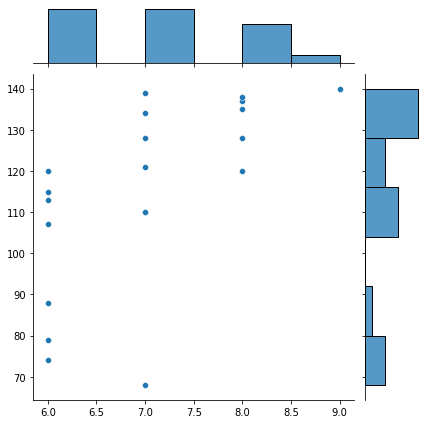

In [11]:
plt.figure(figsize = (8, 8))
sns.jointplot(x= diem_4, y = IQ)
plt.show()

In [12]:
X    = diem_4
xHat = np.c_[np.ones(X.size), X]
y    = IQ
print(xHat)

[[1. 7.]
 [1. 8.]
 [1. 8.]
 [1. 6.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 6.]
 [1. 7.]
 [1. 7.]
 [1. 7.]
 [1. 7.]
 [1. 9.]
 [1. 6.]
 [1. 6.]
 [1. 8.]
 [1. 6.]
 [1. 6.]
 [1. 7.]
 [1. 8.]]


In [13]:
def gradient_descent(alpha, x, y, numIterations):
    N = x.shape[0]
    theta = np.ones(2)
    
    for iter in range(0, numIterations):        
        yHat = x @ theta        
        loss = yHat - y 
        gradient = np.dot(x.T, loss) / N
        
        theta = theta - alpha * gradient             
    return theta

In [14]:
#phương trình dự đoán theo điểm 4
alpha = 0.01
theta = gradient_descent(alpha, xHat, y, 100)
theta

array([ 3.20612371, 15.98535516])

In [15]:
IQ_predict_GD = theta[1] * X + theta[0]
print('   IQ = (', theta[1], ') * diem_4 + (', theta[0], ')')

   IQ = ( 15.985355163944238 ) * diem_4 + ( 3.2061237055100253 )


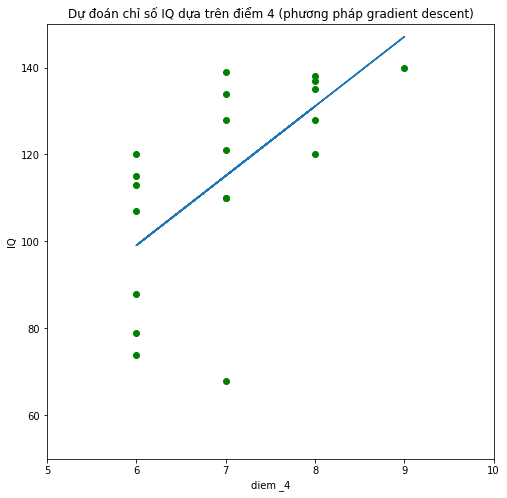

In [16]:
# Biểu diễn trực quan kết quả của Gradient Descent
plt.figure(figsize=(8,8))
plt.xlim(5,10)
plt.ylim(50,150)
plt.scatter(xHat[:,1], IQ, color = "green")
plt.plot(X, IQ_predict_GD)
plt.title('Dự đoán chỉ số IQ dựa trên điểm 4 (phương pháp gradient descent)')
plt.xlabel("diem _4")
plt.ylabel("IQ")
plt.show()

In [17]:
#b) Công thức hiệp phương sai
def cov_predict(x,y):
    mean_x  = np.mean(x)
    delta_x = (x - mean_x).flatten()
    mean_y  = np.mean(y)
    delta_y = (y - mean_y).flatten()

    numerator   = delta_x.dot(delta_y.T)
    denominator = delta_x.dot(delta_x.T)

    slope4      = numerator/denominator
    bias4       = mean_y - (slope4 * mean_x) 
    return slope4,bias4

X    = diem_4
xHat = np.c_[np.ones(X.size), X]
y    = IQ
w,w0 = cov_predict(X,y)
IQ_predict_cov = w * X + w0

print('   IQ = (', w, ') * diem_4 + (', w0, ')\n')

   IQ = ( 15.125 ) * diem_4 + ( 9.325000000000003 )



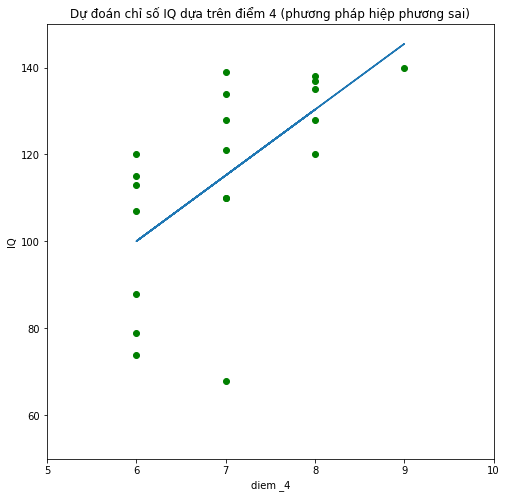

In [18]:
plt.figure(figsize=(8,8))
plt.xlim(5,10)
plt.ylim(50,150)
plt.scatter(X, y, color = "green")
plt.plot(X, IQ_predict_cov)
plt.title('Dự đoán chỉ số IQ dựa trên điểm 4 (phương pháp hiệp phương sai)')
plt.xlabel("diem _4")
plt.ylabel("IQ")
plt.show()

In [19]:
#Dự đoán chỉ số IQ cho tập dữ liệu thử nghiệm (test set): { 0.5, 1.0, 1.5, 2.0, …, 9.0, 9.5, 10 }.
test_set = np.arange(0.5, 10.5, 0.5)
test_set

array([ 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,
        6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [20]:
print('\nDự đoán IQ từ test_set, bằng phương pháp hiệp phương sai :')
IQ_cov_test_set = list(map(int,(w * test_set + w0)))
print(IQ_cov_test_set)

print('\nDự đoán IQ từ test_set, bằng phương pháp Gradient Descent:')
IQ_GD_test_set = list(map(int,(theta[1] * test_set + theta[0])))
print(IQ_GD_test_set)


Dự đoán IQ từ test_set, bằng phương pháp hiệp phương sai :
[16, 24, 32, 39, 47, 54, 62, 69, 77, 84, 92, 100, 107, 115, 122, 130, 137, 145, 153, 160]

Dự đoán IQ từ test_set, bằng phương pháp Gradient Descent:
[11, 19, 27, 35, 43, 51, 59, 67, 75, 83, 91, 99, 107, 115, 123, 131, 139, 147, 155, 163]


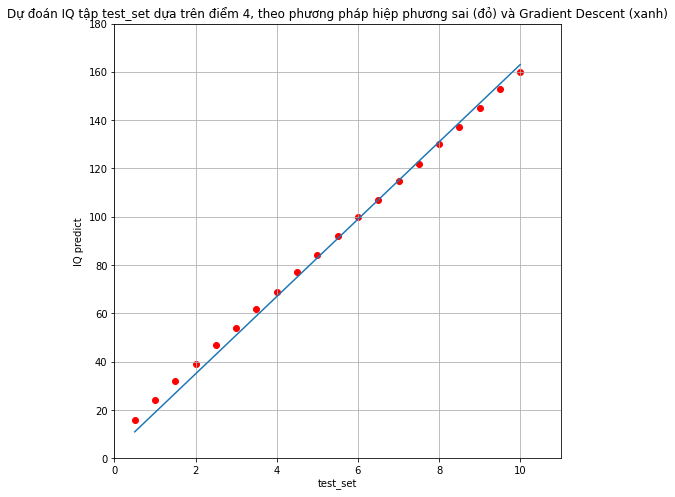

In [21]:
plt.figure(figsize=(8,8))
plt.grid()
plt.xlim(0,11)
plt.ylim(0,180)
plt.plot(test_set, IQ_GD_test_set)
plt.scatter(test_set, IQ_cov_test_set,color='red')
plt.xlabel("test_set")
plt.ylabel("IQ predict")
plt.title('Dự đoán IQ tập test_set dựa trên điểm 4, theo phương pháp hiệp phương sai (đỏ) và Gradient Descent (xanh)')
plt.show()

3.4) Nhận xét kết quả khi dùng diem_5 để dự đoán chỉ số IQ.

In [22]:
## Dùng điểm 5 dự đoán IQ, so sánh với thực tế

diem5=df['diem_5'].to_numpy()
diem5Hat = np.c_[np.ones(diem5.size), diem5]

print('\nDự đoán IQ từ điểm 5, bằng phương pháp hiệp phương sai :')
IQ_cov_diem_5_predict = list(map(int,(w* diem5 + w0)))
print(IQ_cov_diem_5_predict)

print('\nDự đoán IQ từ điểm 5, bằng phương pháp Gradient Descent:')
IQ_GD_diem5 = list(map(int,(theta[1] * diem5 + theta[0])))
print(IQ_GD_diem5)


Dự đoán IQ từ điểm 5, bằng phương pháp hiệp phương sai :
[30, 69, 87, 106, 24, 94, 75, 15, 84, 45, 63, 81, 118, 39, 63, 94, 115, 45, 33, 130]

Dự đoán IQ từ điểm 5, bằng phương pháp Gradient Descent:
[25, 67, 86, 105, 19, 92, 73, 9, 83, 41, 60, 79, 118, 35, 60, 92, 115, 41, 28, 131]


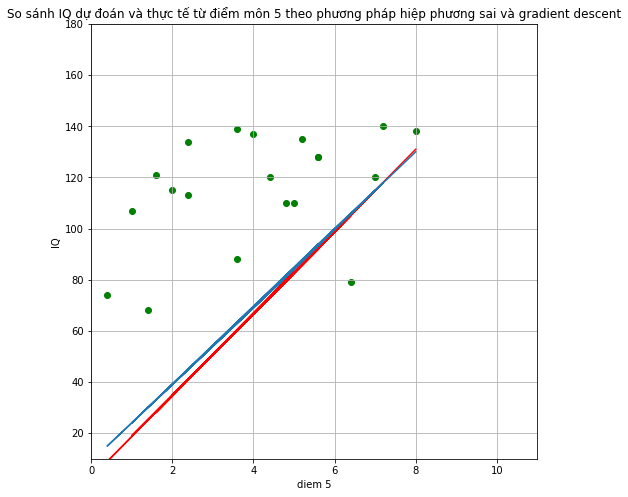

In [23]:

plt.figure(figsize=(8,8))
plt.grid()
plt.xlim(0,11)
plt.ylim(10,180)
plt.scatter(diem5, IQ, color = "green")
plt.plot(diem5, IQ_GD_diem5,color='red')
plt.plot(diem5, IQ_cov_diem_5_predict)
plt.xlabel("diem 5")
plt.ylabel("IQ")
plt.title('So sánh IQ dự đoán và thực tế từ điểm môn 5 theo phương pháp hiệp phương sai và gradient descent')
plt.show()

In [24]:
dif_cov = IQ - IQ_cov_diem_5_predict
print('Khác biệt chỉ số IQ bởi phương pháp hiệp phương sai: \n', dif_cov)

dif_GD = IQ - IQ_GD_diem5
print('Khác biệt chỉ số IQ bởi phương pháp Gradient Descent: \n', dif_GD)

Khác biệt chỉ số IQ bởi phương pháp hiệp phương sai: 
 [ 38  68  48 -27  83  34  45  59  26  89  76  29  22  76  25  34   5  68
  88   8]
Khác biệt chỉ số IQ bởi phương pháp Gradient Descent: 
 [ 43  70  49 -26  88  36  47  65  27  93  79  31  22  80  28  36   5  72
  93   7]


** Nhận xét: Chỉ số IQ dự đoán từ điểm môn 5 dựa trên phương pháp hồi quy tuyến tính (công thức hiệp phương sai) không đúng với thực tế và đa số thấp hơn thực tế. 